In [23]:
import timeit

import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.ion()

In [24]:
if os.path.isfile('./eval1.pkl'):
    ga_evaluation = pd.read_pickle('./eval1.pkl')
else:
    ga_evaluation = pd.DataFrame(columns=['St. gen', 'St. starsev','Velikost pop','Izbira starsev','K Turnir','Tip križanja','Tip muaticje','Mutacija z zamenjavo','Ustavitveni pogoj','AUC','Trajanje'])
if os.path.isfile('./eval2.pkl'):
    ga_evaluation2 = pd.read_pickle('./eval2.pkl')
else:
    ga_evaluation2 = pd.DataFrame(columns=['St. gen', 'St. starsev','Velikost pop','Izbira starsev','K Turnir','Tip križanja','Tip muaticje','Mutacija z zamenjavo','Ustavitveni pogoj','AUC','Trajanje'])
if os.path.isfile('./eval3.pkl'):
    ga_evaluation3 = pd.read_pickle('./eval3.pkl')
else:
    ga_evaluation3 = pd.DataFrame(columns=['St. gen', 'St. starsev','Velikost pop','Izbira starsev','K Turnir','Tip križanja','Tip muaticje','Mutacija z zamenjavo','Ustavitveni pogoj','AUC','Trajanje'])

In [25]:
len(ga_evaluation)
ga_evaluation = ga_evaluation.fillna("None")
ga_evaluation2 = ga_evaluation2.fillna("None")
ga_evaluation3 = ga_evaluation3.fillna("None")
ga_evaluation = pd.concat([ga_evaluation,ga_evaluation2,ga_evaluation3])

Scatter plot

In [26]:
ga_evaluation.columns[:-2]

Index(['St. gen', 'St. starsev', 'Velikost pop', 'Izbira starsev', 'K Turnir',
       'Tip križanja', 'Tip muaticje', 'Mutacija z zamenjavo',
       'Ustavitveni pogoj'],
      dtype='object')

3


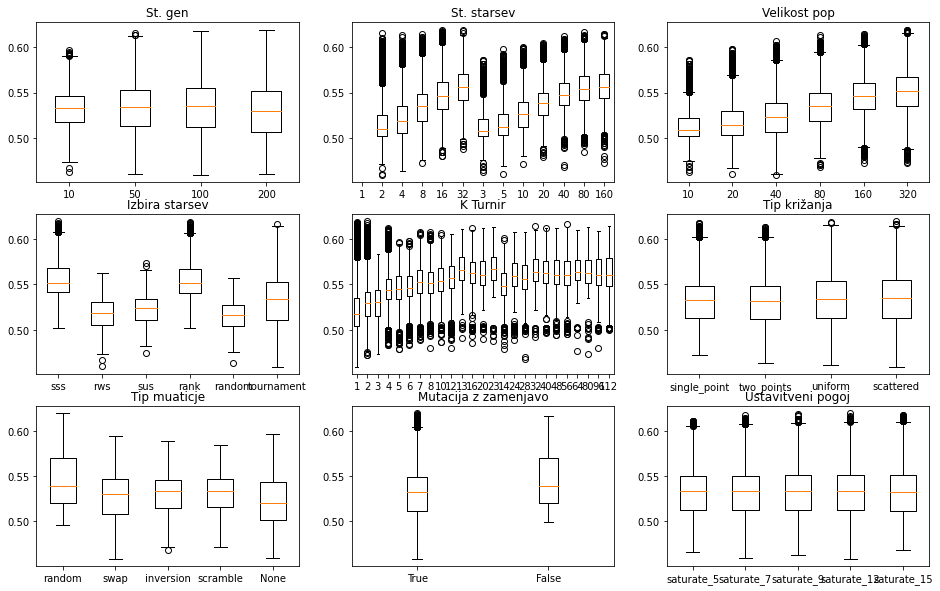

In [27]:
######Type of mutation######

#fig = plt.figure(figsize=(10,10))
#ax = fig.add_axes((0,0,1,1))
rows = int(math.ceil(len(ga_evaluation.columns[:-2])/3))
print(rows)
count = 1
for i in ga_evaluation.columns[:-2]:
    tipi = ga_evaluation[i].unique()    
    datax =  [ga_evaluation['AUC'].loc[(ga_evaluation[i] == labels) & (ga_evaluation["AUC"] != -1) & (ga_evaluation["St. starsev"] >1)] for labels in  tipi]
    plt.subplot(rows,3,count)
    box = plt.boxplot(datax,labels=tipi)
    plt.title(i)
    count = count + 1
plt.show()

20165
3
St. gen
[28034, 27897, 27836, 17135]
St. starsev
[1, 1, 12271, 12389, 12436, 6225, 1, 10730, 10844, 10890, 10905, 9535, 4677]
Velikost pop
[4609, 10776, 16995, 23219, 23322, 21981]
Izbira starsev
[7919, 7703, 7672, 7799, 7436, 62373]
K Turnir
[38973, 16054, 5398, 11215, 2280, 2638, 2279, 5518, 1799, 2518, 479, 2396, 1320, 480, 839, 1200, 840, 1079, 719, 720, 720, 358, 360, 360, 360]
Tip križanja
[25229, 25242, 25213, 25218]
Tip muaticje
[33820, 16705, 16694, 16755, 16928]
Mutacija z zamenjavo
[83972, 16930]
Ustavitveni pogoj
[20165, 20211, 20177, 20165, 20184]


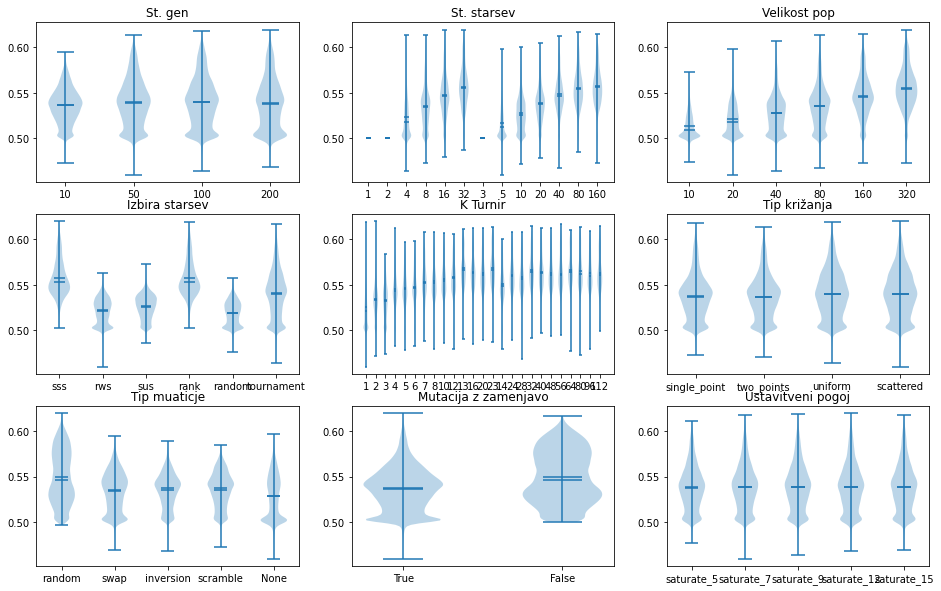

In [36]:
print(len(datax[0]))

rows = int(math.ceil(len(ga_evaluation.columns[:-2])/3))
fig,axs = plt.subplots(rows,3)
print(rows)
row = 0
col = 0
for i in ga_evaluation.columns[:-2]:
    tipi = ga_evaluation[i].unique()

    #datax =  [ga_evaluation['AUC'].loc[(ga_evaluation[i] == labels) & (ga_evaluation["AUC"] != -1)].to_numpy(dtype=float) for labels in  tipi]
    datax =  [ga_evaluation['AUC'].loc[(ga_evaluation[i] == labels) & (ga_evaluation["AUC"] != -1)  & (ga_evaluation["St. starsev"] >3)  ].to_numpy(dtype=float)
              if len(ga_evaluation['AUC'].loc[(ga_evaluation[i] == labels) & (ga_evaluation["AUC"] != -1)  & (ga_evaluation["St. starsev"] >3)   ].to_numpy(dtype=float)) else [0.5] for labels in  tipi]
    print(i)
    print([len(x) for x in datax])
    axs[row,col].violinplot(datax, showmeans=True,showmedians=True,showextrema=True)

    axs[row,col].set_xticks(ticks=range(1,len(tipi)+1),labels=tipi)
    axs[row,col].set_title(i)
    axs[row,col].xaxis.set_ticks_position('bottom')
    #box = plt.boxplot(datax,labels=tipi)
    #plt.title(i)
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1
plt.show()

In [29]:
ga_evaluation['St. starsev'].loc[ga_evaluation["Tip križanja"] == i].sort_values(ascending=False)

Series([], Name: St. starsev, dtype: int64)

Text(0.5, 1.0, 'idk')

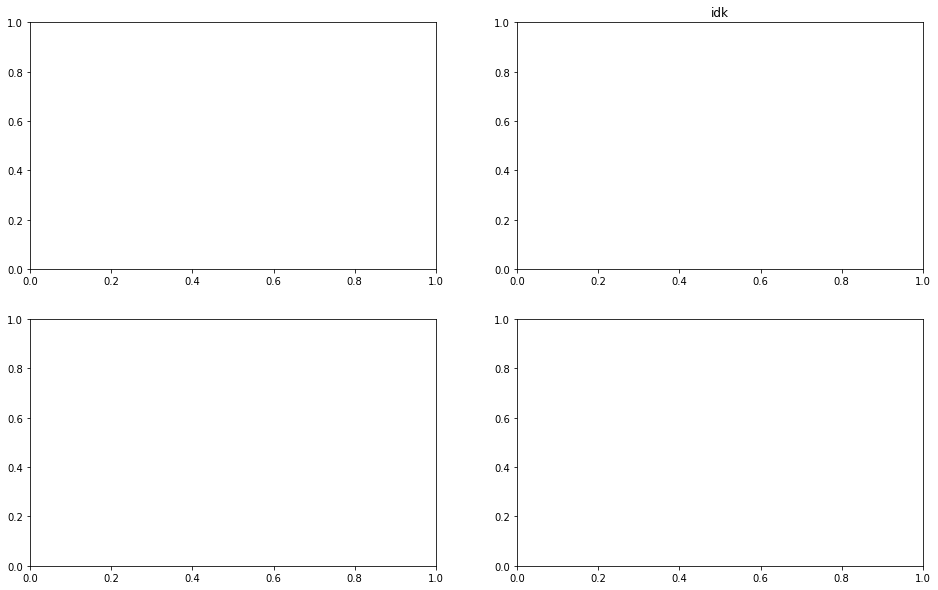

In [30]:
(fig,ax)=plt.subplots(2,2)
ax[0,1].set_title("idk")

Speed test

In [31]:
if os.path.isfile('./ticker400_data.pickle'):
    with open('ticker400_data.pickle', 'rb') as handle:
        ticker400_data = pickle.load(handle)
    with open('ticker400_trend15.pickle', 'rb') as handle:
        ticker400_trend15 = pickle.load(handle)
    with open('ticker400_tren10.pickle', 'rb') as handle:
        ticker400_trend10 = pickle.load(handle)
    with open('ticker400_trend20.pickle', 'rb') as handle:
        ticker400_trend20 = pickle.load(handle)


ticker400_trend10B = {}
ticker400_trend15B = {}
ticker400_trend20B = {}

for t in ticker400_data:
    ticker400_trend10B[t] = pd.DataFrame(data=[False]*len(ticker400_data[t]))
    ticker400_trend10B[t].iloc[ticker400_trend10[t]] = True
    ticker400_trend15B[t] = pd.DataFrame(data=[False]*len(ticker400_data[t]))
    ticker400_trend15B[t].iloc[ticker400_trend15[t]] = True
    ticker400_trend20B[t] = pd.DataFrame(data=[False]*len(ticker400_data[t]))
    ticker400_trend20B[t].iloc[ticker400_trend20[t]] = True


splits25 = {g: train_test_split(ticker400_data[g],shuffle=False)for g in ticker400_data}
splits25_YB = {g:{10:train_test_split(ticker400_trend10B[g],shuffle=False),15:train_test_split(ticker400_trend15B[g],shuffle=False),20:train_test_split(ticker400_trend20B[g],shuffle=False)} for g in ticker400_data}
#splits50rolling = {g: train_test_split(ticker400_data[g], train_size=0.5,shuffle=False)for g in ticker400_data}
splits50rolling = {}

In [32]:
def fit_params_AUC_lagged_combined_special(df,dfY,tick,percent,n_lagged = 20,sty=0):
    def fita(solution, index):
        #47 genov
        #solution = [retUP,volUP,vol5UP,vol10UP,vol15UP,vol20UP,retDW,volDW,vol5DW,vol10DW,vol15DW,vol20DW,priorRUp,priorVUp,priorvol5UP,priorvol10UP,priorvol15UP,priorvol20UP,priorRDW,priorVDW,priorvol5DW,priorvol10DW,priorvol15DW,priorvol20DW,posR,pos1,pos5,pos10,pos15,pos20,posRD,pos1D,pos5D,pos10D,pos15D,pos20D,con1,con2,con3,con4,con5,cond1,cond2,cond3,cond4,cond5,skupi]

        ####TRANSLATE TO POS ARGS####
        posu = [-1]*6
        posd = [-1]*6
        start = 0
        for i in solution[24:30]:
            if i not in posu:
                posu[start] = i
            start = start + 1
        start = 0
        for i in solution[30:36]:
            if i not in posd:
                posd[start] = i
            start = start + 1
        start = 0
        last = 0
        for i in posu:
            if i == -1:
                for last in range(last,6):
                    if last not in posu:
                        posu[start] = last
                        break
            start = start + 1
        start = 0
        last = 0
        for i in posd:
            if i == -1:
                for last in range(last,6):
                    if last not in posd:
                        posd[start] = last
                        break
            start = start + 1

        #############################

        for ite in range(len(solution)):
            if ite<12 and solution[ite] <= -1:
                return -1
            elif ite>=12 and solution[ite] < 0:
                return -1
        solution = [x[0] if hasattr(x,'__len__') else x for x in solution]
        #print(solution)
        col = 'volume%'
        if n_lagged == 5:
            col = 'volume5%'
        if n_lagged == 10:
            col = 'volume10%'
        if n_lagged == 15:
            col = 'volume15%'
        if n_lagged == 20:
            col = 'volume20%'

        test = df[tick][1][n_lagged-1:]

        ############QUERY SPEED TEST##############
        col_names = ['return_sh','vol_sh','vol5_sh','vol10_sh','vol15_sh','vol20_sh']
        test['return_sh'] = test['return'].shift( (solution[12]))
        test['vol_sh'] = test['volume%'].shift( (solution[13]))
        test['vol5_sh'] = test['volume5%'].shift( (solution[14]))
        test['vol10_sh'] = test['volume10%'].shift( (solution[15]))
        test['vol15_sh'] = test['volume15%'].shift( (solution[16]))
        test['vol20_sh'] = test['volume20%'].shift( (solution[17]))
        test = test.reset_index()
        if sty == 0:
            u0 = ' | ' if solution[36] else ' & '
            u1 = ' | ' if solution[37] else ' & '
            u2 = ' | ' if solution[38] else ' & '
            u3 = ' | ' if solution[39] else ' & '
            u4 = ' | ' if solution[40] else ' & '

            connec = ' | ' if solution[-1] else ' & '

            d0 = ' | ' if solution[41] else ' & '
            d1 = ' | ' if solution[42] else ' & '
            d2 = ' | ' if solution[43] else ' & '
            d3 = ' | ' if solution[44] else ' & '
            d4 = ' | ' if solution[45] else ' & '
            q = ('(' +col_names[posu[0]] + ' > ' + str(solution[posu[0]]) + u0 +
                '(' +col_names[posu[1]] + ' > ' + str(solution[posu[1]]) + u1 +
                '(' +col_names[posu[2]] + ' > ' + str(solution[posu[2]]) + u2 +
                '(' +col_names[posu[3]] + ' > ' + str(solution[posu[3]]) + u3 +
                '(' +col_names[posu[4]] + ' > ' + str(solution[posu[4]]) + u4 +
                '(' +col_names[posu[5]] + ' > ' + str(solution[posu[5]]) + '))))))' +
                connec +
                '(' +col_names[posd[0]] + ' < ' + str(solution[posd[0]]) + d0 +
                '(' +col_names[posd[1]] + ' < ' + str(solution[posd[1]]) + d1 +
                '(' +col_names[posd[2]] + ' < ' + str(solution[posd[2]]) + d2 +
                '(' +col_names[posd[3]] + ' < ' + str(solution[posd[3]]) + d3 +
                '(' +col_names[posd[4]] + ' < ' + str(solution[posd[4]]) + d4 +
                '(' +col_names[posd[5]] + ' < ' + str(solution[posd[5]]) + '))))))')

            up = test.query(q).index
            res = np.array([False]*len(df[tick][1][n_lagged-1:]))
            res[up] =True
        else:

            up = [np.array([False]*len(df[tick][1][n_lagged-1:])) for i in range(6)]
            down = [np.array([False]*len(df[tick][1][n_lagged-1:]))*6 for i in range(6)]
            eval_stringu = ""
            eval_stringd = ""
            for i in range(6):
                idxu =test.loc[(test[col_names[i]].shift(solution[i+12]) > solution[i])].index - test[col_names[i]].shift(solution[i+12]).index[0]
                #print(idxu)
                up[i][idxu] = True
                idxd = test.loc[(test[col_names[i]].shift(solution[i+18]) > solution[i+6])].index - test[col_names[i]].shift(solution[i+18]).index[0]
                #print(down[i])
                down[i][idxd] = True

            for i in range(5):
                eval_stringu = f"{eval_stringu}{'np.logical_or' if solution[i+36] else 'np.logical_and'}(up[posu[{i}]], "
                eval_stringd = f"{eval_stringd}{'np.logical_or' if solution[i+41] else 'np.logical_and'}(down[posd[{i}]], "
            eval_stringu = f"{eval_stringu}up[posu[5]] )))))"
            #print(eval_stringu)
            eval_stringd = f"{eval_stringd}down[posd[5]] )))))"
            #print(eval_stringd)
            #np.logical_or(np.logical_and(up[posu[0]], np.logical_or(up[posu[1]], np.logical_or(up[posu[2]], np.logical_and(up[posu[3]], np.logical_and(up[posu[4]], up[posu[5]] ))))),np.logical_and(up[posu[0]], np.logical_or(up[posu[1]], np.logical_or(up[posu[2]], np.logical_and(up[posu[3]], np.logical_and(up[posu[4]], np.logical_and(up[posd[4]], down[posd[5]] )))))))
            res = eval(f"{'np.logical_or' if solution[-1] else 'np.logical_and'}({eval_stringu},{eval_stringd})")

        """
        cut = 0
        for k in reversed(up):
            if k < len(df[tick][1][n_lagged-1:]):
                break
            else:
                cut = cut+1
        if cut > 0:
            up = up[:-cut]
        #down = list(find_intersect_2_ordered_lists(lfVDw,lfRDw))
        cut = 0
        for k in reversed(down):
            if k < len(df[tick][1][n_lagged-1:]):
                break
            else:
                cut = cut+1
        if cut > 0:
            down = down[:-cut]
        if up is not None :
            res.iloc[up] = True
        if down is not None :
            res.iloc[down] = True
        """

        #print(roc_auc_score(dfY[tick][percent][0],res))
        return roc_auc_score(dfY[tick][percent][1][n_lagged-1:],res)
    return fita

In [33]:
dnk = [1.3,1.5,0.2,1.2,0.43,0.9,0.1,0.3,1.1,0.6,0.2,0.73,3,4,1,6,5,5,2,1,3,2,6,2,0,3,5,3,2,2,1,4,2,3,3,5,0,1,1,0,0,1,0,1,1,0,1]
splits25 = {g: train_test_split(ticker400_data[g],shuffle=False)for g in ticker400_data}
splits25_YB = {g:{10:train_test_split(ticker400_trend10B[g],shuffle=False),15:train_test_split(ticker400_trend15B[g],shuffle=False),20:train_test_split(ticker400_trend20B[g],shuffle=False)} for g in ticker400_data}
print("time query:")
percent = 10
t1 = timeit.Timer("fit_params_AUC_lagged_combined_special(splits25,splits25_YB,t,percent,sty = 1)(dnk,0)",globals = globals())
print(t1.timeit(5))
print("time np bool:")
splits25 = {g: train_test_split(ticker400_data[g],shuffle=False)for g in ticker400_data}
splits25_YB = {g:{10:train_test_split(ticker400_trend10B[g],shuffle=False),15:train_test_split(ticker400_trend15B[g],shuffle=False),20:train_test_split(ticker400_trend20B[g],shuffle=False)} for g in ticker400_data}
t2 = timeit.Timer("fit_params_AUC_lagged_combined_special(splits25,splits25_YB,t,percent,sty = 0)(dnk,0)",globals = globals())
print(t2.timeit(5))

time query:


/tmp/ipykernel_23511/1671080006.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['return_sh'] = test['return'].shift( (solution[12]))
/tmp/ipykernel_23511/1671080006.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['vol_sh'] = test['volume%'].shift( (solution[13]))
/tmp/ipykernel_23511/1671080006.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

0.20366254900000058
time np bool:
0.1922051569999894


/tmp/ipykernel_23511/1671080006.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['return_sh'] = test['return'].shift( (solution[12]))
/tmp/ipykernel_23511/1671080006.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['vol_sh'] = test['volume%'].shift( (solution[13]))
/tmp/ipykernel_23511/1671080006.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [34]:
gene_space = [{'low':-1,'high':8} for x in range(12)]+[[y for y in range(20)] for j in range(12)] + [list(range(6)) for i in range(12)] +[[0,1] for i in range(11)]
gene_type = [np.float16 for x in range(12)]+[np.uint8 for x in range(12+23)]
suppress_warnings = True
res[t][percent]['train'] = pygad.GA(num_genes=47,gene_space=gene_space,gene_type=gene_type,save_best_solutions=True,suppress_warnings=suppress_warnings,num_generations=best.loc["St. gen"],num_parents_mating=best.loc["St. starsev"],fitness_func=fit_params_AUC_lagged_combined_special(splits25,splits25_YB,t,percent),sol_per_pop=best.loc["Velikost pop"],parent_selection_type=best.loc["Izbira starsev"],K_tournament=best.loc["K Turnir"],crossover_type=best.loc["Tip križanja"],mutation_type=best.loc["Tip muaticje"],mutation_by_replacement=best.loc["Mutacija z zamenjavo"],stop_criteria=best.loc["Ustavitveni pogoj"])
res[t][percent]['train'].run()
res[t][percent]['test'] = fit_params_AUC_lagged_combinedOR_test(splits25,splits25_YB,t,percent,sty = 0 or 1)(res[t][percent]['train'].best_solutions[-1])

NameError: name 'pygad' is not defined